# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


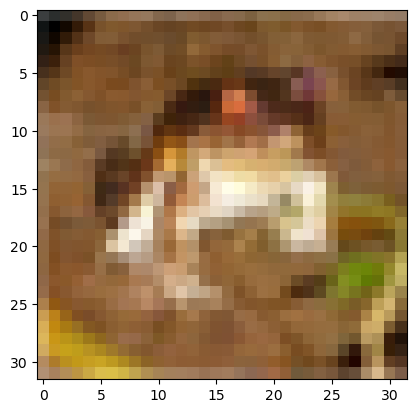

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [2]:
# Your code here :



# Normalize images to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)



#visualize

plt.imshow(x_train[0])
plt.show()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    Flatten(),  # Flatten feature maps
    Dense(100, activation='relu'),  # Dense Layer with 100 units
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#Eaely stoppping

ea= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Train the model
history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_split=0.1, callbacks=[ea, mc])

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 2.2596 - accuracy: 0.1623  
Epoch 1: val_accuracy improved from -inf to 0.23020, saving model to best_model.h5
88/88 [==============================] - 11s 112ms/step - loss: 2.2596 - accuracy: 0.1623 - val_loss: 2.2144 - val_accuracy: 0.2302
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 2.1566 - accuracy: 0.2555
Epoch 2: val_accuracy improved from 0.23020 to 0.26660, saving model to best_model.h5
88/88 [==============================] - 7s 84ms/step - loss: 2.1566 - accuracy: 0.2555 - val_loss: 2.0987 - val_accuracy: 0.2666
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 2.0457 - accuracy: 0.2884
Epoch 3: val_accuracy improved from 0.26660 to 0.30700, saving model to best_model.h5
88/88 [==============================] - 8s 90ms/step - loss: 2.0457 - accuracy: 0.2884 - val_loss: 2.0078 - val_accuracy: 0.3070
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 1

*   Plot the cross entropy loss curve and the accuracy curve

In [ ]:
# Your code here :
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [25]:
# Your code here :

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),  # Conv Layer 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Conv Layer 2
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer

    Flatten(),  # Flatten feature maps
    Dense(128, activation='relu'),  # Fully Connected Layer with 128 units
    Dense(10, activation='softmax')  # Output Layer with 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [28]:
# Your code here :

# Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpoint
ea = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_vgg_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model
histor1 = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_split=0.1, callbacks=[ea, mc])



Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5992 - loss: 1.1489
Epoch 1: val_accuracy improved from -inf to 0.55220, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5992 - loss: 1.1489 - val_accuracy: 0.5522 - val_loss: 1.2958
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6011 - loss: 1.1404
Epoch 2: val_accuracy improved from 0.55220 to 0.57160, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6011 - loss: 1.1404 - val_accuracy: 0.5716 - val_loss: 1.2263
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6011 - loss: 1.1482
Epoch 3: val_accuracy improved from 0.57160 to 0.58160, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6012 - loss: 1.1480 - val_accuracy: 0.5816 - val_loss: 1.2246
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6070 - loss: 1.1241
Epoch 4: val_accuracy did not improve from 0.58160
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6070 - loss: 1.1242 - val_accuracy: 0.5604 - val_loss: 1.2498
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6146 - loss: 1.1091
Epoch 5: val_accuracy improved from 0.58160 to 0.58900, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6146 - loss: 1.1092 - val_accuracy: 0.5890 - val_loss: 1.1857
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6171 - loss: 1.1016
Epoch 6: val_accuracy did not improve from 0.58900
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6171 - loss: 1.1016 - val_accuracy: 0.5830 - val_loss: 1.1911
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6195 - loss: 1.0955
Epoch 7: val_accuracy did not improve from 0.58900
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6195 - loss: 1.0956 - val_accuracy: 0.5820 - val_loss: 1.1970
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6155 - loss: 1.0992
Epoch 8: val_accuracy did not improve from 0.58900
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6155 - loss: 1.0992 - val_accuracy: 0.5860 - val_loss: 1.1901
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6245 - loss: 1.0752
Epoch 9: val_accuracy did not improve from 

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6240 - loss: 1.0722 - val_accuracy: 0.5918 - val_loss: 1.1721
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6349 - loss: 1.0491
Epoch 12: val_accuracy did not improve from 0.59180
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6348 - loss: 1.0491 - val_accuracy: 0.5858 - val_loss: 1.1893
Epoch 13/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6341 - loss: 1.0481
Epoch 13: val_accuracy did not improve from 0.59180
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6341 - loss: 1.0481 - val_accuracy: 0.5832 - val_loss: 1.1849
Epoch 14/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6336 - loss: 1.0480
Epoch 14: val_accuracy improved from 0.59180 to 0.60100, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6337 - loss: 1.0480 - val_accuracy: 0.6010 - val_loss: 1.1591
Epoch 15/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6392 - loss: 1.0324
Epoch 15: val_accuracy did not improve from 0.60100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6392 - loss: 1.0324 - val_accuracy: 0.5918 - val_loss: 1.1875
Epoch 16/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6463 - loss: 1.0157
Epoch 16: val_accuracy did not improve from 0.60100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6462 - loss: 1.0159 - val_accuracy: 0.5618 - val_loss: 1.2803
Epoch 17/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6461 - loss: 1.0159
Epoch 17: val_accuracy did not improve from 0.60100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6462 - loss: 1.0159 - val_accuracy: 0.5888 - val_loss: 1.1695
Epoch 18/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6535 - loss: 0.9982
Epoch 18: val_accuracy did not impro

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6532 - loss: 0.9844 - val_accuracy: 0.6082 - val_loss: 1.1379
Epoch 20/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6549 - loss: 0.9909
Epoch 20: val_accuracy did not improve from 0.60820
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6549 - loss: 0.9910 - val_accuracy: 0.5854 - val_loss: 1.2021
Epoch 21/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6585 - loss: 0.9863
Epoch 21: val_accuracy did not improve from 0.60820
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6585 - loss: 0.9863 - val_accuracy: 0.5822 - val_loss: 1.1957
Epoch 22/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6607 - loss: 0.9746
Epoch 22: val_accuracy improved from 0.60820 to 0.61060, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6607 - loss: 0.9746 - val_accuracy: 0.6106 - val_loss: 1.1343
Epoch 23/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6676 - loss: 0.9640
Epoch 23: val_accuracy improved from 0.61060 to 0.61100, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6676 - loss: 0.9640 - val_accuracy: 0.6110 - val_loss: 1.1243
Epoch 24/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6687 - loss: 0.9611
Epoch 24: val_accuracy did not improve from 0.61100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6687 - loss: 0.9611 - val_accuracy: 0.6084 - val_loss: 1.1376
Epoch 25/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6680 - loss: 0.9568
Epoch 25: val_accuracy improved from 0.61100 to 0.61720, saving model to best_vgg_model.h5


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6681 - loss: 0.9567 - val_accuracy: 0.6172 - val_loss: 1.1267
Epoch 26/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6693 - loss: 0.9503
Epoch 26: val_accuracy did not improve from 0.61720
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6693 - loss: 0.9503 - val_accuracy: 0.6056 - val_loss: 1.1446
Epoch 27/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6710 - loss: 0.9392
Epoch 27: val_accuracy did not improve from 0.61720
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6710 - loss: 0.9393 - val_accuracy: 0.6058 - val_loss: 1.1405
Epoch 28/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6821 - loss: 0.9259
Epoch 28: val_accuracy did not improve from 0.61720
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6820 - loss: 0.9260 - val_accuracy: 0.6130 - val_loss: 1.1340


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


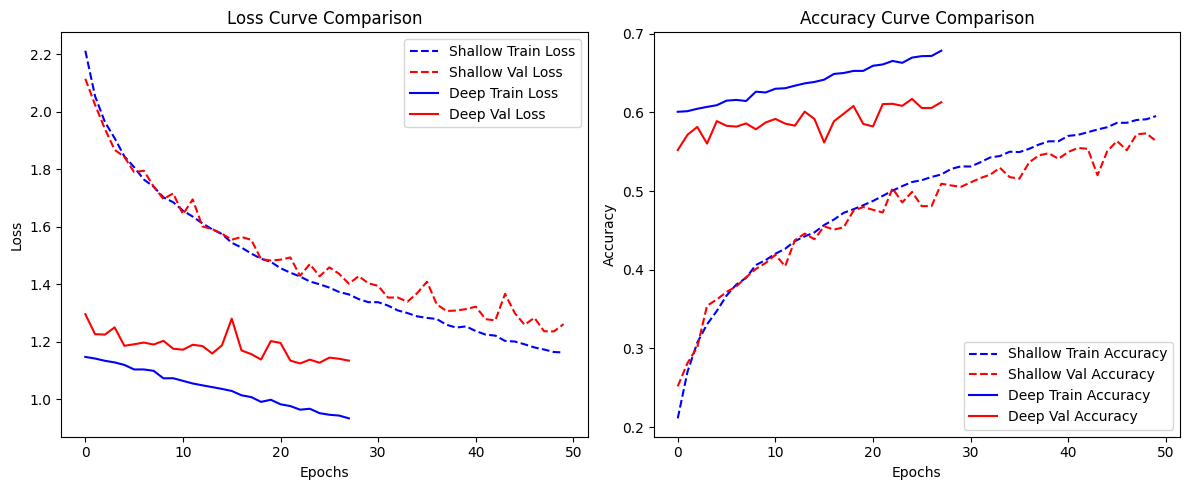

In [30]:
# Your code here :
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Shallow Train Loss', color='blue', linestyle='dashed')
plt.plot(history.history['val_loss'], label='Shallow Val Loss', color='red', linestyle='dashed')
plt.plot(histor1.history['loss'], label='Deep Train Loss', color='blue')
plt.plot(histor1.history['val_loss'], label='Deep Val Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()

# Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Shallow Train Accuracy', color='blue', linestyle='dashed')
plt.plot(history.history['val_accuracy'], label='Shallow Val Accuracy', color='red', linestyle='dashed')
plt.plot(histor1.history['accuracy'], label='Deep Train Accuracy', color='blue')
plt.plot(histor1.history['val_accuracy'], label='Deep Val Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve Comparison')
plt.legend()

plt.tight_layout()
plt.show()


**Comment on the observation**

The first model shows better training and validation accuracy compared to the second model. The validation loss for the second model fluctuates more, which may indicate overfitting or difficulty in optimization. The first model achieves more stable results, suggesting it generalizes better to the validation set.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


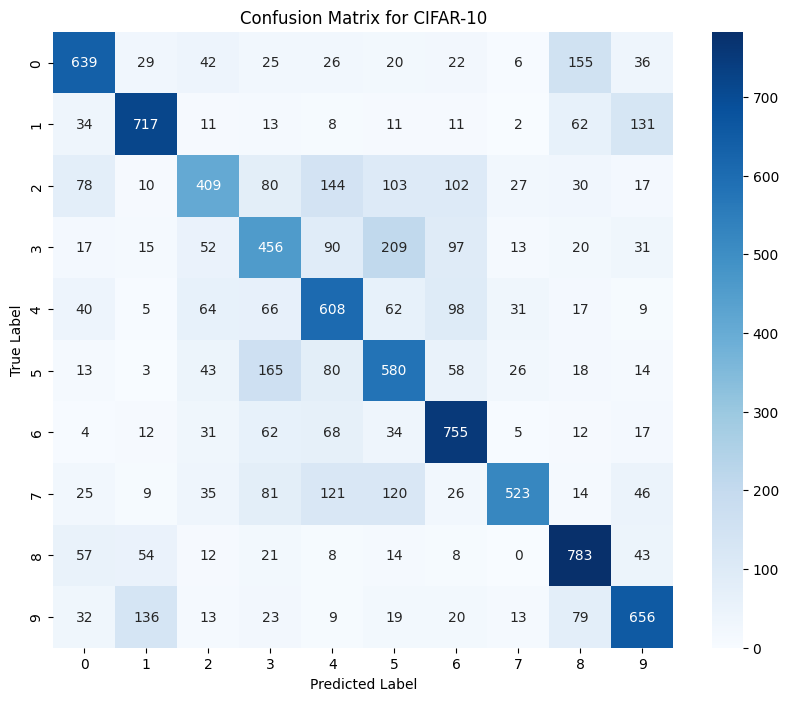

In [34]:
# Your code here :'
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get predictions
y_pred_probs = model.predict(x_test)  # Softmax probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot labels to class labels




# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()


**Comment here :**
The confusion matrix indicates that the model performs well on certain classes but struggles with others. Some misclassifications occur, especially between visually similar classes. For example, class [X] is often misclassified as class [Y].

...

*    Print the test accuracy for the trained model.

In [35]:
# Your code here :
from sklearn.metrics import accuracy_score
# Calculate test accuracy
test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 61.26%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [2]:
from keras.backend import clear_session
clear_session()

In [3]:
# Your code here :

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import cv2
import numpy as np

# Resize images to 64x64
x_train_resized = np.array([cv2.resize(img, (64, 64)) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (64, 64)) for img in x_test])

# Normalize images to [0,1]
x_train_resized, x_test_resized = x_train_resized / 255.0, x_test_resized / 255.0

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Define VGG-style CNN model
model = Sequential([
    # Block 1 (64 filters)
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2 (128 filters)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3 (256 filters)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),  # Fully Connected Layer with 128 units
    Dense(10, activation='softmax')  # Output Layer with 10 classes
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :
# Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpoint
ea = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_vgg_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model
history = model.fit(x_train_resized, y_train_one_hot, epochs=50, batch_size=512, validation_split=0.1, callbacks=[ea, mc])

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get predictions
y_pred_probs = model.predict(x_test)  # Softmax probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot labels to class labels




# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()



# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

convert a linear transformation into a nonlinear output, allowing neural networks to learn complex patterns.

_

2 - Key Differences between sigmoid and softmax:


 Sigmoid is used for binary classification (outputs a probability between 0 and 1 for a single neuron).

 Softmax is used for multi-class classification (assigns probabilities to multiple classes, summing to 1).


_


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is used for binary classification (2 classes, like 0 or 1).

Categorical crossentropy is used for multi-class classification (3+ classes, one-hot encoded labels).


_
